In [7]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import pandas as pd

In [9]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
%ls

 Volume in drive C has no label.
 Volume Serial Number is 52FA-6853

 Directory of C:\Users\thiag\Desktop\Python_Challenges\HW

08/06/2018  04:33 PM    <DIR>          .
08/06/2018  04:33 PM    <DIR>          ..
08/06/2018  04:31 PM    <DIR>          .ipynb_checkpoints
08/06/2018  04:33 PM           392,414 climate_starter.ipynb
08/06/2018  04:25 PM    <DIR>          Images
08/06/2018  04:25 PM             5,165 README.md
08/06/2018  04:25 PM    <DIR>          Resources
               2 File(s)        397,579 bytes
               5 Dir(s)  810,022,486,016 bytes free


In [11]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [13]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [43]:
# Create our session (link) from Python to the DB
session = Session(engine)
engine.table_names()

['measurement', 'station']

In [50]:
engine.execute('SELECT * from measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [55]:

from sqlalchemy.ext.automap import automap_base

# Query all tobs values# Query 
results = session.query(Measurement.tobs).all()
# Convert list of tuples into normal list
tobs_values = list(np.ravel(results))


In [69]:
# Query for last 12 months of precipitation

last_12_months_precipitation = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= '2016-08-24').filter(Measurement.date <= '2017-08-23').order_by(Measurement.date).all()
    
    
last_12_months_precipitation
    
    
# Set above query results to dataframe
df_last12months_precipitation = pd.DataFrame(data=last_12_months_precipitation)
df_last12months_precipitation.head(2)    

df_last12months_precipitation = df_last12months_precipitation.dropna().reset_index()

df_last12months_precipitation = df_last12months_precipitation[["date","prcp"]]
df_last12months_precipitation.head(2)

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15


# Exploratory Climate Analysis

<IPython.core.display.Javascript object>


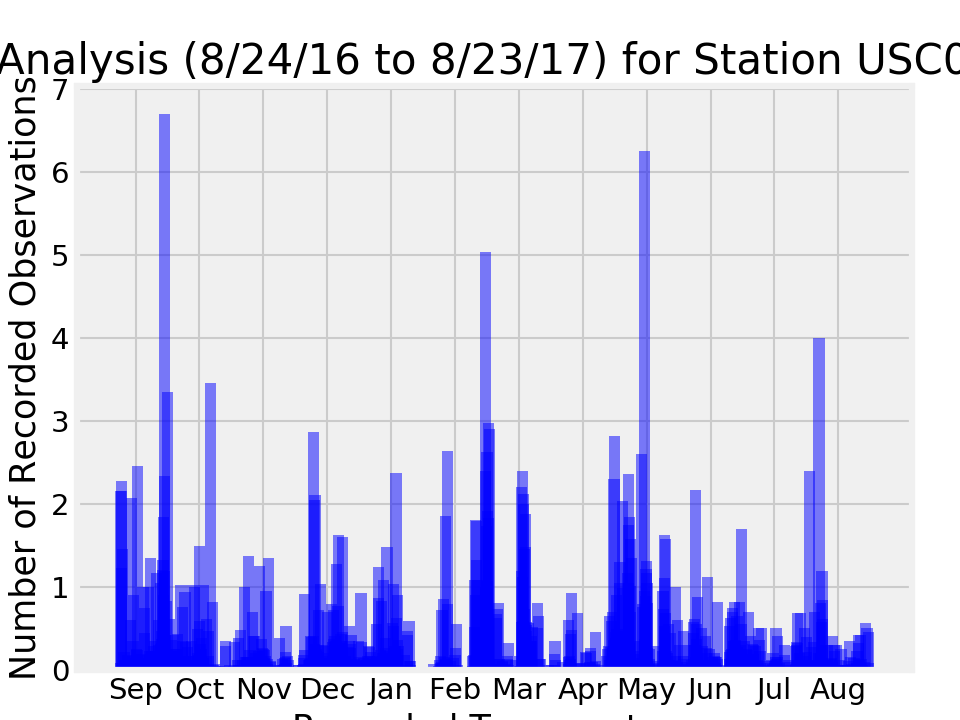

In [60]:
# Define labels
plt.title("Precipitation for last 12 Months")
plt.xlabel("Month")
plt.ylabel("Precipitation in inches")

# Define months for x-ticks labels
months = ["Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"]

# Define X and Y values
y = df_last12months_precipitation["prcp"].tolist()
x = np.arange(0, len(df_last12months_precipitation.index.tolist()), 1)

# Define X-tick labels (months) and their positioning
month_total = len(y)
month_step_xticks = int((month_total / 12)*1.03)
plt.ylim = max(y) + 1
tick_locations = [x+55 for x in range(1, month_total, month_step_xticks)]


# Define plot# Define 
plt.bar(x, y, width=30, color="blue", alpha=0.5, align="edge")
plt.xticks(tick_locations, months)

plt.show()


In [99]:
df_last12months_precipitation.head()
df_last12months_precipitation["Month-Year"] = df_last12months_precipitation['date'].apply(lambda x:x[:7])
df_last12_0 =df_last12months_precipitation.groupby(["Month-Year"])['prcp'].count().reset_index()
df_last12_1 = df_last12months_precipitation.groupby(["Month-Year"])['prcp'].sum().reset_index()
df_last12_off = pd.merge(df_last12_0,df_last12_1, how="inner", on="Month-Year" )


In [100]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df_last12_off.describe()

,prcp_x,prcp_y
count,13.000000,13.000000
mean,155.000000,27.351538
std,41.222971,14.172282
min,47.000000,5.180000
25%,167.000000,20.520000
50%,171.000000,23.720000
75%,173.000000,35.510000
max,179.000000,54.910000


In [173]:
# How many stations are available in this dataset?

totalnumber_of_stations = session.query(func.count(Station.station)).first()
# Print results of above count query
print(f"Total number of stations: {str(totalnumber_of_stations[0])}")

ok =pd.read_sql("SELECT count(*) FROM station", 
            engine.connect())

stations_1 = ok.iloc[0,0]

print('Total number of stattions:{}'.format(stations_1))


Total number of stations: 9
Total number of stattions:9


In [128]:
# measurement = engine.execute("SELECT * FROM measurement")
# cols, data = measurement.keys(), measurement.fetchall()
# df_measurement = pd.DataFrame(data, columns=cols).head()
# df_measurement.groupby('station')['station'].count()


In [131]:
# What are the most active stations?
# List the stations and the counts in descending order.
active_stations_descending = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
df_active_stations_descending = pd.DataFrame(data=active_stations_descending, columns=['Station', 'Count'])
df_active_stations_descending.head()

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [210]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

df_measurement = pd.read_sql("SELECT * FROM measurement", 
            engine.connect())
df_measurement= df_measurement.query('station == "USC00519281"')
min_mea = df_measurement['tobs'].min()
max_mea = df_measurement['tobs'].max()
avg_mea = round(df_measurement['tobs'].mean(),2)

print("Lowest_tem:{} |Highest_Temp:{} |Average_Tem:{}".format(min_mea,max_mea,avg_mea))

Lowest_tem:54.0 |Highest_Temp:85.0 |Average_Tem:71.66


In [201]:
last_12_months_temperature = session.query(Measurement.date, Measurement.tobs).\
        filter(Measurement.date >= '2016-08-24').filter(Measurement.date <= '2017-08-23').filter(Measurement.station =="USC00519281").order_by(Measurement.date).all()
    
last_12_months_temperature = pd.DataFrame(last_12_months_temperature).head(3)
last_12_months_temperature

,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0


In [204]:
# last_12_months_temperature.plot.hist(alpha=0.5, bins=10)

plt.hist(last_12_months_temperature['tobs'],12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Number of Recorded Observations")
plt.title("Station Analysis (8/24/16 to 8/23/17) for Station " + "USC00519281")
plt.show()

<IPython.core.display.Javascript object>


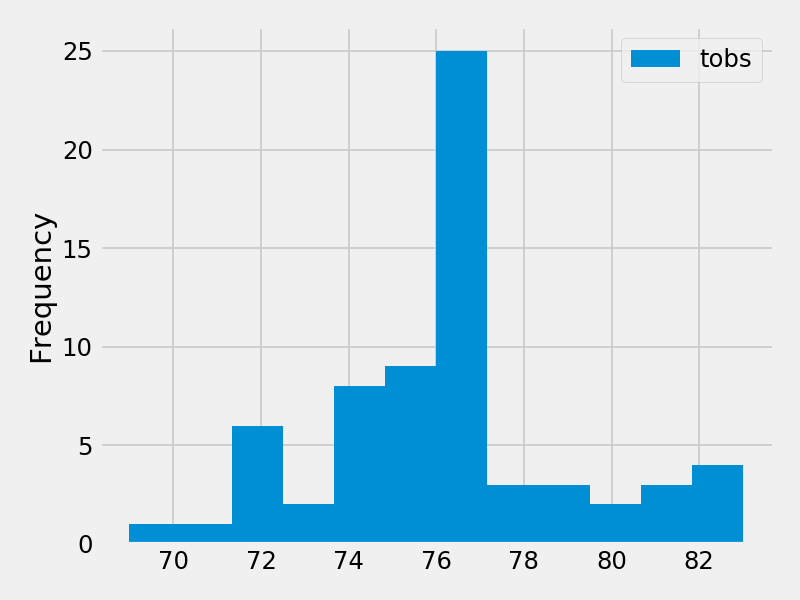

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [206]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [207]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_arrive = dt.date(2018, 4, 1)
trip_leave = dt.date(2018, 4, 15)
last_year = dt.timedelta(days=365)
temp_avg_lst_year = (calc_temps((trip_arrive-last_year), (trip_leave-last_year)))
print(temp_avg_lst_year)


[(67.0, 74.47368421052632, 82.0)]


<IPython.core.display.Javascript object>


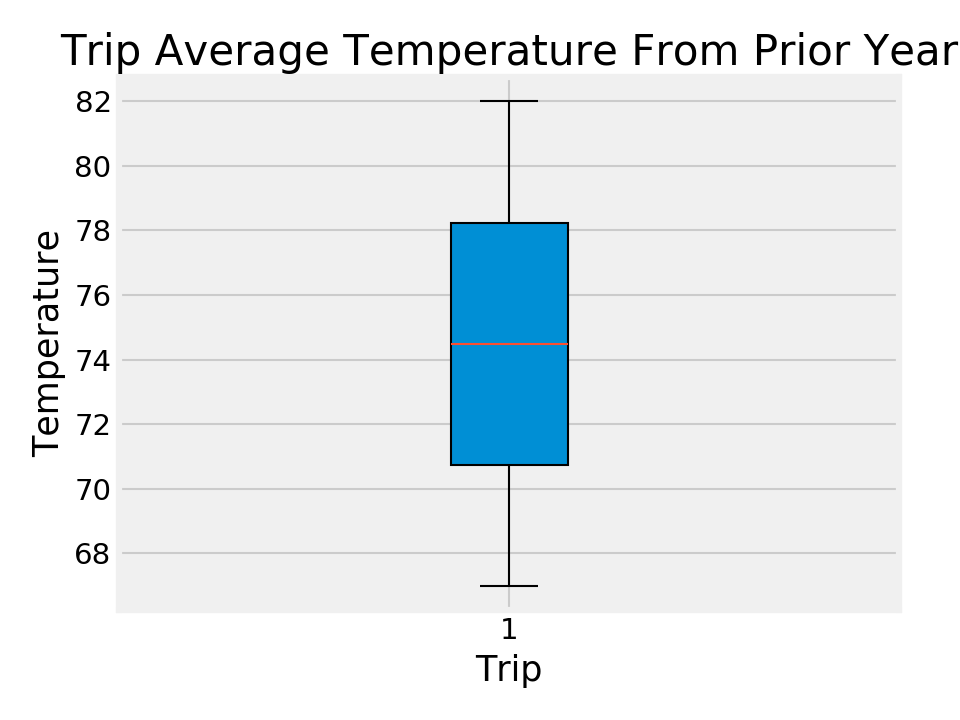

In [208]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots()
x = range(len(temp_avg_lst_year))
ax.boxplot(temp_avg_lst_year, patch_artist=True)
ax.set_title('Trip Average Temperature From Prior Year')
ax.set_ylabel("Temperature")
ax.set_xlabel("Trip")
fig.tight_layout()
plt.show()

## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


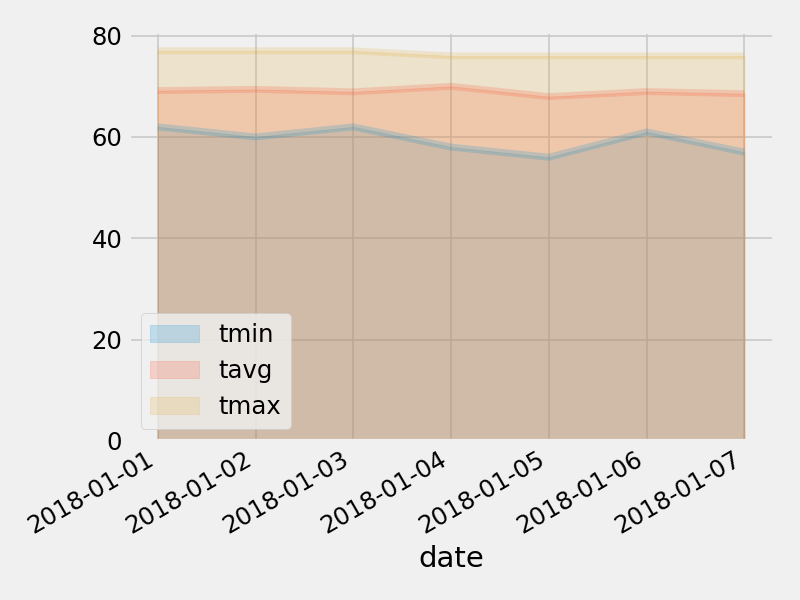

In [23]:
# Plot the daily normals as an area plot with `stacked=False`


,count(*)
0,9


['measurement', 'station']

In [223]:
ok =pd.read_sql("SELECT * FROM measurement where date> '2016-07-01' and date < '2017-07-01' ", 
            engine.connect())


In [224]:
ok

,id,station,date,prcp,tobs
0,2312,USC00519397,2016-07-02,0.00,79.0
1,2313,USC00519397,2016-07-03,0.00,77.0
2,2314,USC00519397,2016-07-04,0.04,79.0
3,2315,USC00519397,2016-07-05,0.02,78.0
4,2316,USC00519397,2016-07-06,0.02,78.0
5,2317,USC00519397,2016-07-07,0.01,80.0
6,2318,USC00519397,2016-07-08,0.00,80.0
7,2319,USC00519397,2016-07-09,0.00,80.0
8,2320,USC00519397,2016-07-10,0.02,78.0
9,2321,USC00519397,2016-07-11,0.00,72.0
